In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [48]:

movies = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')

In [49]:
movies.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [50]:
movies.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [51]:
movies.isnull().mean()*100

Name         0.000000
Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.932878
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64

In [52]:
movies.dropna(inplace= True)
movies.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [53]:


movies['Votes'] = movies['Votes'].str.replace(',', '', regex=True).astype(int)

movies['Votes']

1           8
3          35
5         827
6        1086
8         326
         ... 
15493     408
15494    1496
15503      44
15505     655
15508      20
Name: Votes, Length: 5659, dtype: int64

In [54]:

movies.drop_duplicates(inplace = True)

In [55]:
movies['Name'] = movies['Name'].str.extract('([A-Za-z\s\'\-]+)')

In [56]:

movies['Year'] = movies['Year'].str.replace(r'[()]', '', regex=True).astype(int)

In [57]:
movies['Duration'] = pd.to_numeric(movies['Duration'].str.replace(r' min', '', regex=True), errors='coerce')

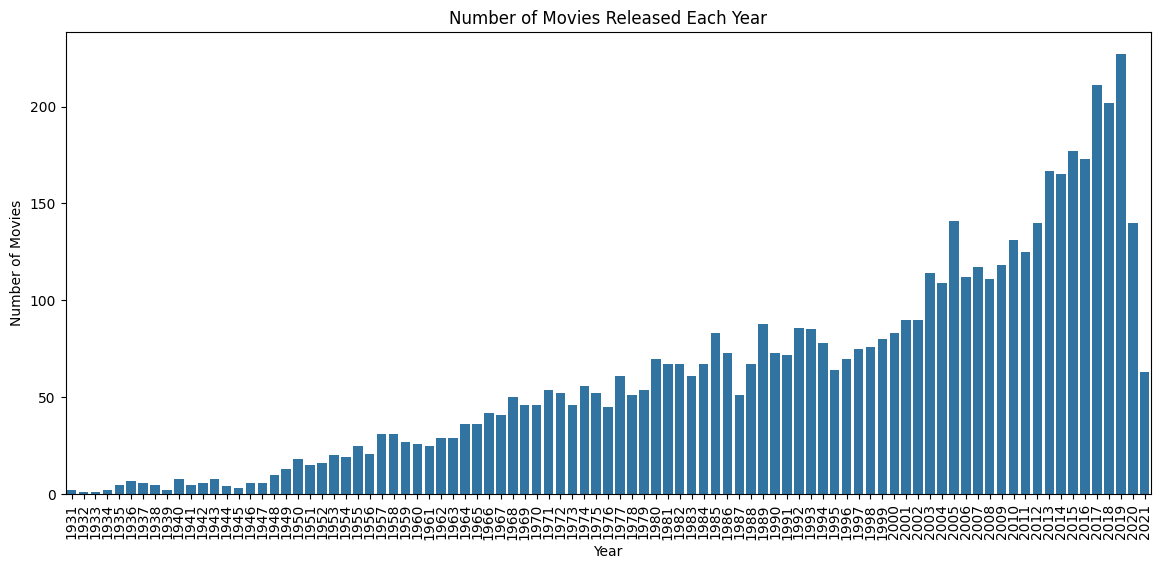

In [58]:


plt.figure(figsize=(14, 6))
sns.countplot(data=movies, x='Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Each Year')
plt.xticks(rotation=90)
plt.show()

<ipython-input-59-8e591a91a552>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Rating', y ='Votes', data=movies, palette=custom_palette)


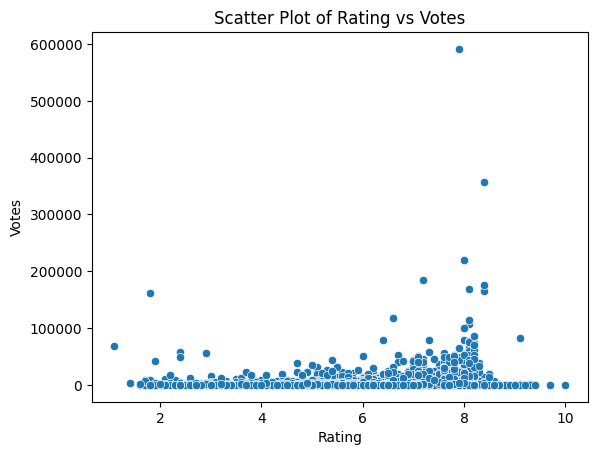

In [59]:
custom_palette ="Blues"
sns.scatterplot(x='Rating', y ='Votes', data=movies, palette=custom_palette)

plt.title("Scatter Plot of Rating vs Votes")

plt.show()

In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:

categorical_variables = ['Genre', 'Director', 'Actor 1','Actor 2','Actor 3']
for feature in categorical_variables:
    le = LabelEncoder()
    movies[feature] = le.fit_transform(movies[feature])


In [62]:
X = movies[['Genre', 'Director', 'Actor 1','Actor 2','Actor 3']]
y = movies['Rating']

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X)


In [64]:

X= features_scaled
y = movies['Rating']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
print(X.shape, X_train.shape, X_test.shape)

(5659, 5) (4527, 5) (1132, 5)


In [67]:

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [68]:

y_pred = model.predict(X_test)

### Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [69]:

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 1.82
R-squared: 0.01
